In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', palette='deep')
import warnings
warnings.filterwarnings('ignore')
import time
bins = range(0,100,10)
%matplotlib inline

import os
print(os.listdir("../input"))

['Churn_Modelling.csv']


In [2]:
df_raw = pd.read_csv('../input/Churn_Modelling.csv')

In [3]:
df_raw.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df_raw.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df_raw.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [6]:
#Visualizing Dataset
def barchart (feature1, feature2):
    g = pd.crosstab(df_raw[feature1], df_raw[feature2]).plot(kind= 'bar', figsize=(10,10), rot=45)
    ax = g.axes
    for p in ax.patches:
        ax.annotate(f"{p.get_height() * 100 / df_raw.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='gray', rotation=0, xytext=(0, 10),
         textcoords='offset points')
    plt.title('Exited bank for {}'.format(feature1))
    plt.legend(['Did Not Exited', 'Exited'])
    plt.grid(b= True, which='major', linestyle='--')
    plt.xlabel('{}'.format(feature1))
    plt.tight_layout()
    plt.ylabel('Quantity')

def bar_chart_group(feature):
    g = pd.crosstab(pd.cut(df_raw[feature], bins), df_raw['Exited']).plot(kind='bar', figsize=(12,12), rot = 45)
    ax = g.axes
    for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / df_raw.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='gray', rotation=0, xytext=(0, 10),
         textcoords='offset points') 
    plt.grid(b=True, which='major', linestyle='--')
    plt.legend(['Did Not Exited', 'Exited'])
    plt.title('Exited bank for {}'.format(feature))
    plt.xlabel('{}'.format(feature))
    plt.tight_layout()
    plt.ylabel('Quantity')

def geography (feature1, feature2):
    df_raw.groupby(feature1)[feature2].sum().sort_values().plot(kind='bar', figsize=(10,10), rot=45)
    plt.title('Geography {}'.format(feature2))
    plt.grid(b=True, which='major', linestyle='--')
    plt.tight_layout()
    plt.ylabel('{}'.format(feature2))    
    

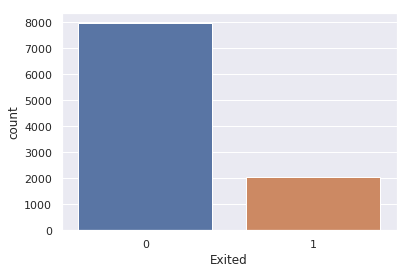

In [7]:
sns.countplot(df_raw.Exited)

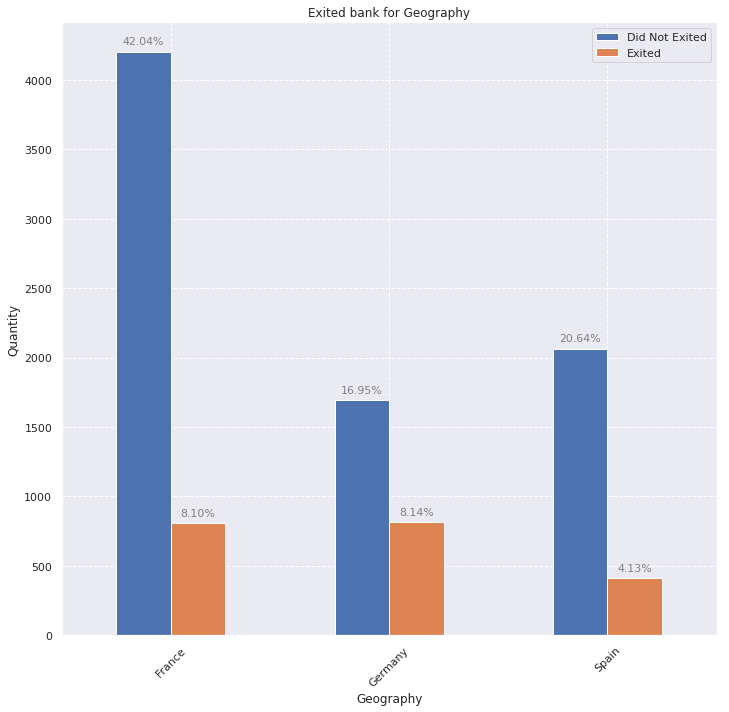

In [8]:
barchart('Geography', 'Exited')

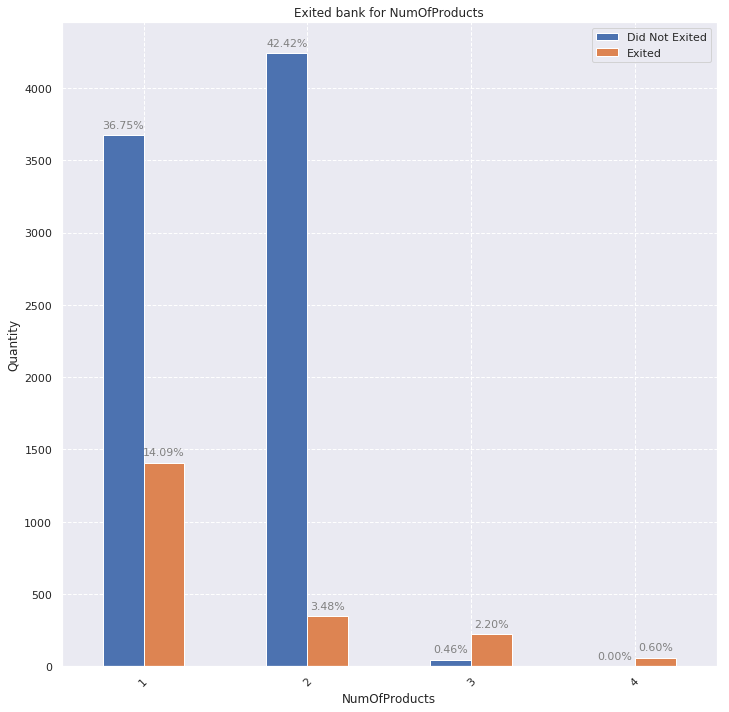

In [9]:
barchart('NumOfProducts', 'Exited')

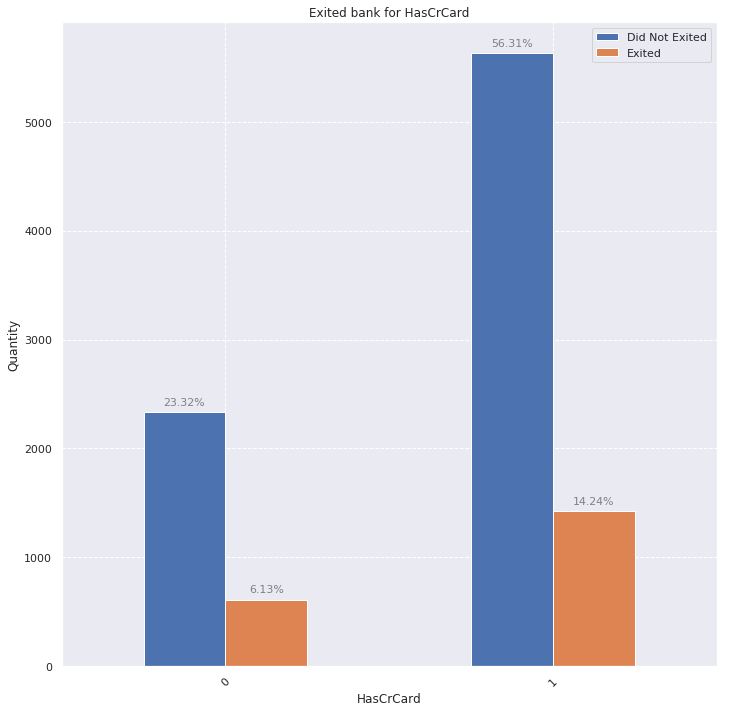

In [10]:
barchart('HasCrCard', 'Exited')

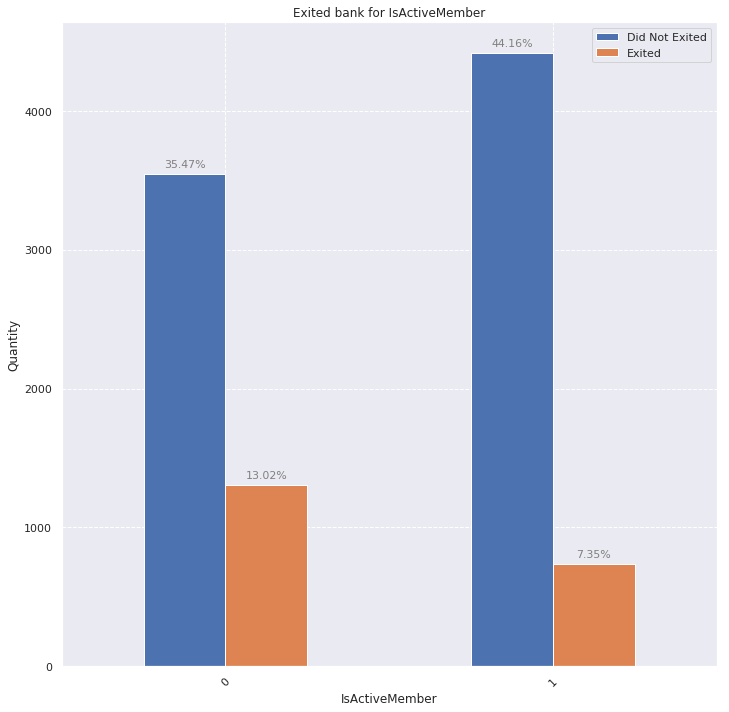

In [11]:
barchart('IsActiveMember', 'Exited')

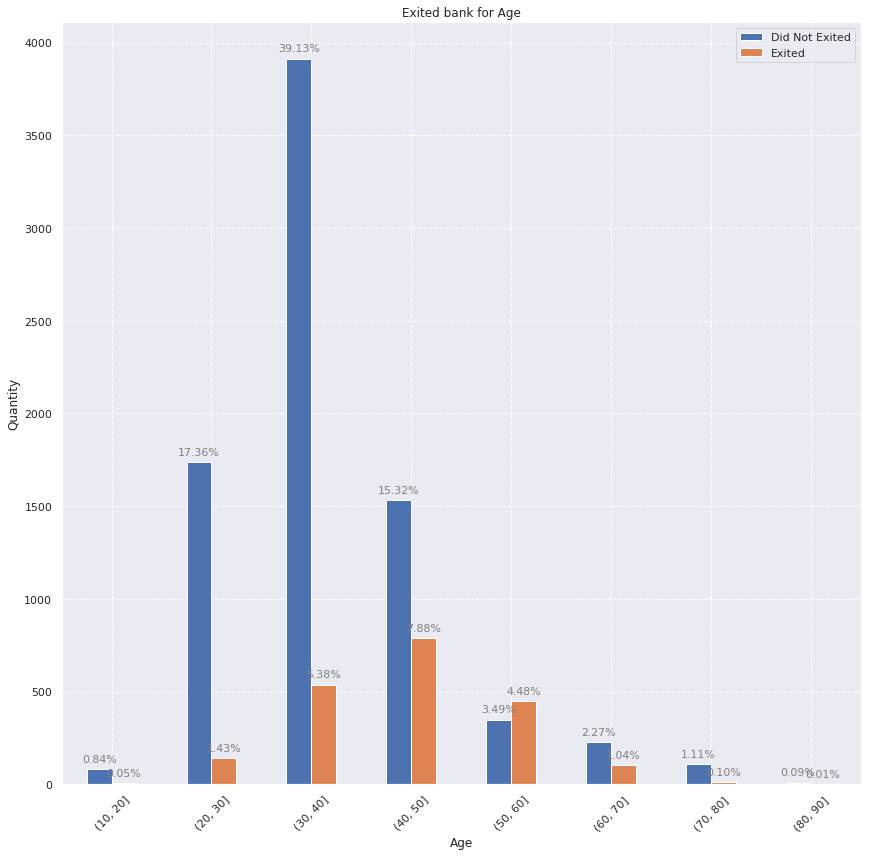

In [12]:
bar_chart_group('Age')

In [13]:
#Taking latitude and longitude
from geopy.geocoders import Nominatim
lat = np.array([])
lon = np.array([])
country = np.array([])
countries = df_raw.groupby('Geography')['Geography'].unique().sort_values()
for i in range(0, len(countries)):
    geolocator = Nominatim(user_agent='tito', timeout=100)
    location = geolocator.geocode(countries.index[i], timeout=100)
    lat = np.append(lat, location.latitude)
    lon = np.append(lon, location.longitude)
    country = np.append(country, countries.index[i])

In [14]:
#Importing Map
import folium
data = pd.DataFrame({
'lat':lat,
'lon':lon,
'name':country})
data.head()    

m = folium.Map(location=[20, 0], tiles="Mapbox Bright", zoom_start=3 , )
country_map = list(zip(data['name'].values, data['lat'].values, data['lon'].values))
# add features
for country_map in country_map:
    folium.Marker(
        location=[float(country_map[1]), float(country_map[2])],
        popup=folium.Popup(country_map[0], parse_html=True),
        icon=folium.Icon(icon='home')
    ).add_to(m)   
m

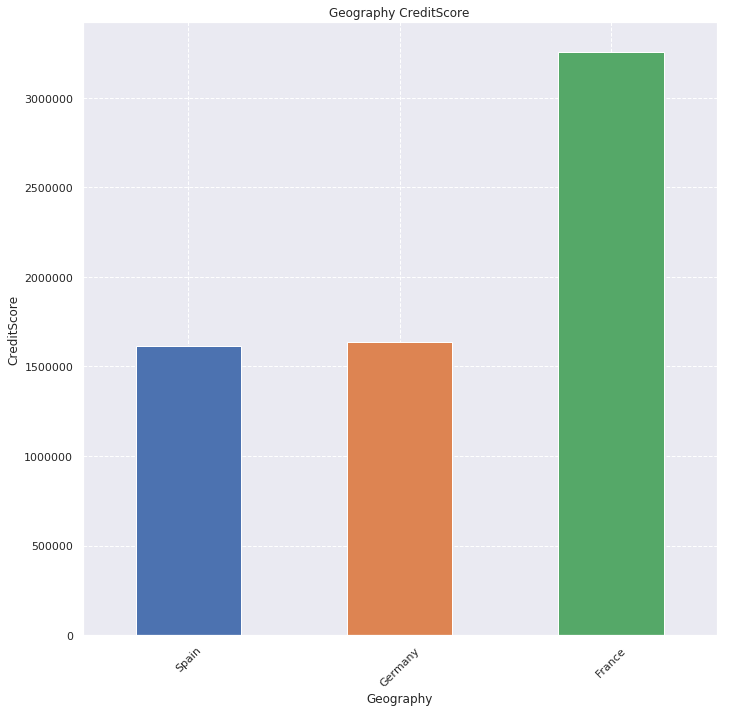

In [15]:
geography('Geography','CreditScore')

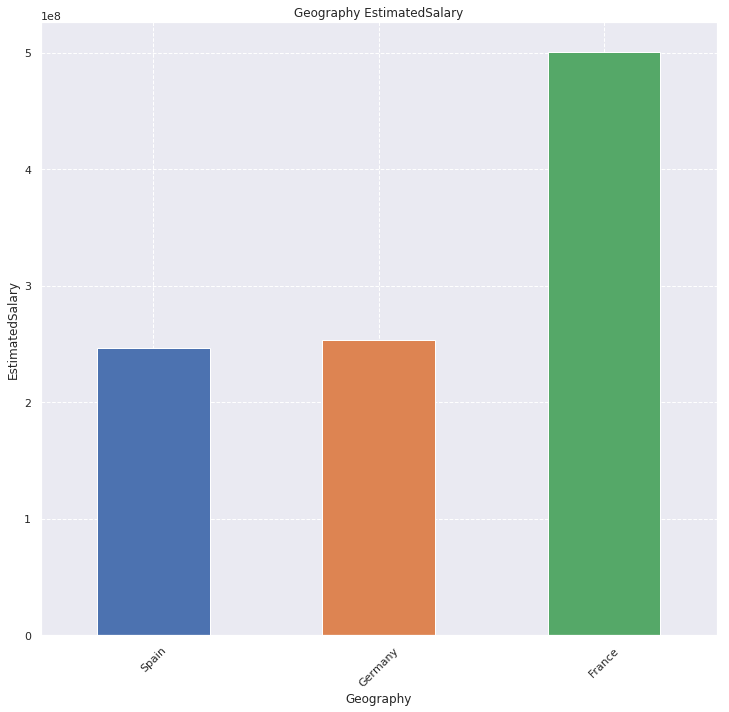

In [16]:
geography('Geography','EstimatedSalary')

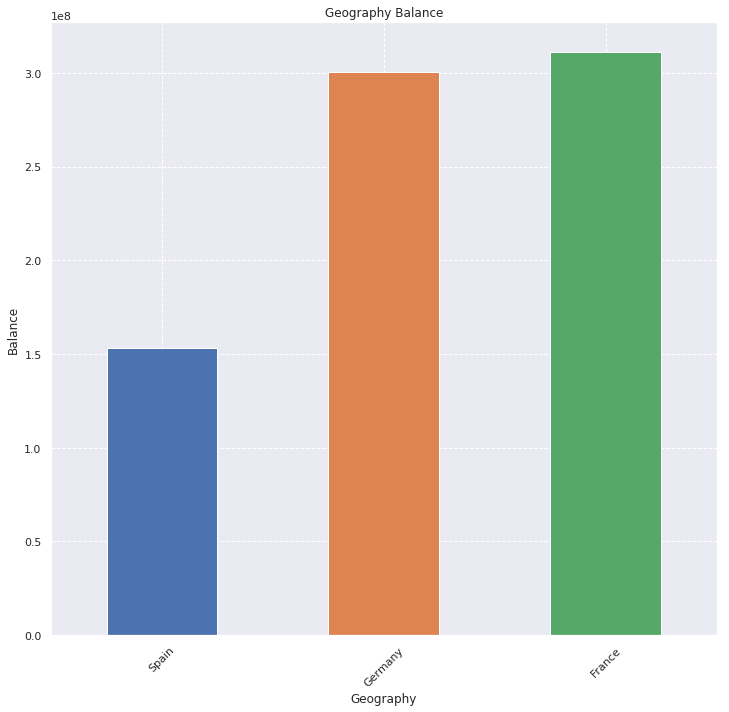

In [17]:
geography('Geography','Balance')

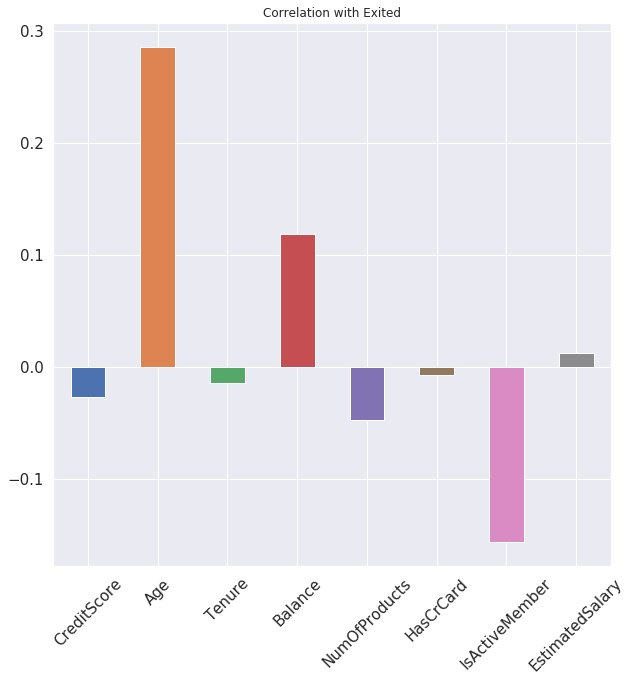

In [18]:
## Correlation with independent Variable 
df2 = df_raw.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
df2.corrwith(df_raw['Exited']).plot.bar(
        figsize = (10, 10), title = "Correlation with Exited", fontsize = 15,
        rot = 45, grid = True)

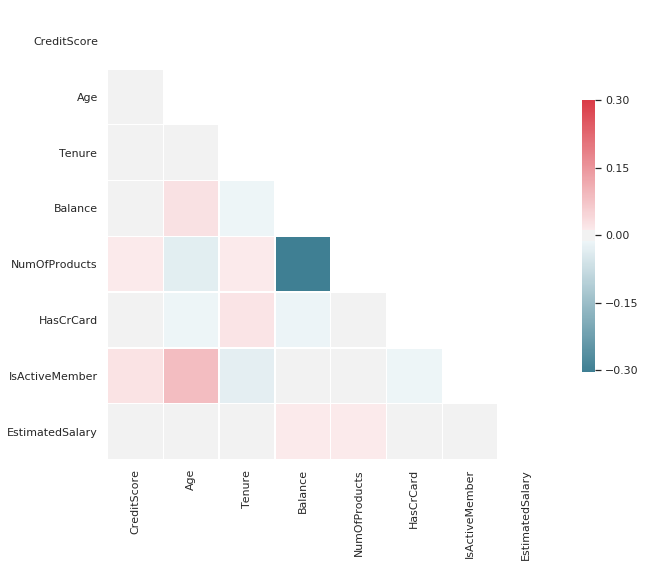

In [19]:
sns.set(style="white")
# Compute the correlation matrix
corr = df2.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

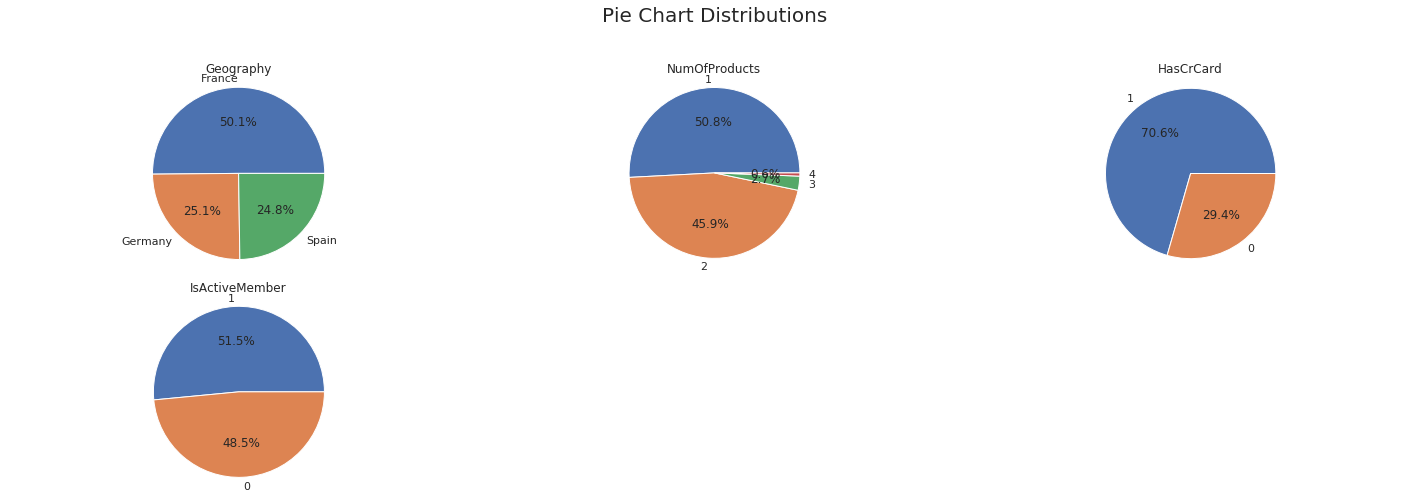

In [20]:
## Pie Plots 
df_raw.columns
df2 = df_raw.drop(['RowNumber', 'CustomerId', 'Surname', 'Gender', 
                   'CreditScore', 'Age','Tenure', 'Balance',
                   'EstimatedSalary', 'Exited'], axis=1)
fig = plt.figure(figsize=(20, 20))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, df2.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(df2.columns.values[i - 1])
   
    values = df2.iloc[:, i - 1].value_counts(normalize = True).values
    index = df2.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [21]:
#Data Analysis
df_raw.describe()    

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [22]:
exited = df_raw['Exited'].value_counts()

In [23]:
countNotExited = len(df_raw[df_raw['Exited'] == 0])     
countExited  = len(df_raw[df_raw['Exited'] == 1]) 
print('Percentage not Exited: {:.2f}%'.format((countNotExited/len(df_raw)) * 100)) 
print('Percentage Exited: {:.2f}%'.format((countExited/len(df_raw)) * 100))

Percentage not Exited: 79.63%
Percentage Exited: 20.37%


In [24]:
df_raw.groupby(df_raw['Exited']).mean().head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,,,
0,5024.694964,1.569117e+07,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,4905.917526,1.569005e+07,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


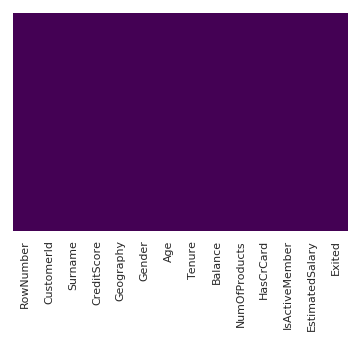

In [25]:
#Looking for Null Values
sns.heatmap(df_raw.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [26]:
df_raw.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [27]:
df_raw.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [30]:
null_percentage = (df_raw.isnull().sum()/len(df_raw) * 100)

In [31]:
null_percentage = pd.DataFrame(null_percentage, columns = ['Percentage Null Values (%)'])

In [32]:
null_percentage

,Percentage Null Values (%)
RowNumber,0.0
CustomerId,0.0
Surname,0.0
CreditScore,0.0
Geography,0.0
Gender,0.0
Age,0.0
Tenure,0.0
Balance,0.0
NumOfProducts,0.0


In [33]:
#Define X and y
X = df_raw.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = df_raw['Exited']

In [34]:
#Get Dummies
X = pd.get_dummies(X)

In [35]:
#Avoiding Dummies Trap
X.columns
X = X.drop(['Geography_France', 'Gender_Female' ], axis=1)

In [36]:
#Splitting the Dataset into the Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=0) 

In [37]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = pd.DataFrame(sc_x.fit_transform(X_train), columns=X.columns.values)
X_test = pd.DataFrame(sc_x.transform(X_test), columns=X.columns.values)

In [38]:
#Importing Keras libraries e packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [39]:
#Initialising the ANN
classifier = Sequential()

In [40]:
#Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 11))

Instructions for updating:
Colocations handled automatically by placer.


In [41]:
#Adding the second hidden layer
classifier.add(Dense(output_dim = 12, init = 'uniform', activation = 'relu'))

In [42]:
#Adding the third hidden layer
classifier.add(Dense(output_dim = 24, init = 'uniform', activation = 'relu'))

In [43]:
#Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

In [44]:
#Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [45]:
#Fit classifier to the training test
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
8000/8000 [==============================] - 2s 250us/step - loss: 0.4654 - acc: 0.7955
Epoch 2/100
8000/8000 [==============================] - 1s 153us/step - loss: 0.4234 - acc: 0.7962
Epoch 3/100
8000/8000 [==============================] - 1s 141us/step - loss: 0.4175 - acc: 0.8234
Epoch 4/100
8000/8000 [==============================] - 1s 140us/step - loss: 0.4128 - acc: 0.8296
Epoch 5/100
8000/8000 [==============================] - 1s 138us/step - loss: 0.4086 - acc: 0.8315
Epoch 6/100
8000/8000 [==============================] - 1s 139us/step - loss: 0.4041 - acc: 0.8347
Epoch 7/100
8000/8000 [==============================] - 1s 137us/step - loss: 0.4014 - acc: 0.8360
Epoch 8/100
8000/8000 [==============================] - 1s 138us/step - loss: 0.3994 - acc: 0.8360
Epoch 9/100
8000/8000 [==============================] - 1s 139us/step - loss: 0.3983 - acc: 0.8361
Epoch 10/100
8000/8000 [============================

8000/8000 [==============================] - 1s 139us/step - loss: 0.3367 - acc: 0.8612
Epoch 80/100
8000/8000 [==============================] - 1s 143us/step - loss: 0.3366 - acc: 0.8624
Epoch 81/100
8000/8000 [==============================] - 1s 142us/step - loss: 0.3366 - acc: 0.8600
Epoch 82/100
8000/8000 [==============================] - 1s 140us/step - loss: 0.3356 - acc: 0.8601
Epoch 83/100
8000/8000 [==============================] - 1s 142us/step - loss: 0.3370 - acc: 0.8605
Epoch 84/100
8000/8000 [==============================] - 1s 139us/step - loss: 0.3361 - acc: 0.8595
Epoch 85/100
8000/8000 [==============================] - 1s 142us/step - loss: 0.3364 - acc: 0.8609
Epoch 86/100
8000/8000 [==============================] - 1s 138us/step - loss: 0.3363 - acc: 0.8596
Epoch 87/100
8000/8000 [==============================] - 1s 140us/step - loss: 0.3357 - acc: 0.8615
Epoch 88/100
8000/8000 [==============================] - 1s 139us/step - loss: 0.3356 - acc: 0.8619
Epo

In [46]:
#Predicting the test set result
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5) 

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
results = pd.DataFrame([['ANN', acc]],
               columns = ['Model', 'Accuracy'])

In [48]:
results

,Model,Accuracy
0,ANN,0.8595


In [49]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(output_dim = 24, init = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = 1)
accuracies.mean()
accuracies.std()


Epoch 1/100
7200/7200 [==============================] - 2s 215us/step - loss: 0.4750 - acc: 0.7940
Epoch 2/100
7200/7200 [==============================] - 1s 159us/step - loss: 0.4249 - acc: 0.8017
Epoch 3/100
7200/7200 [==============================] - 1s 143us/step - loss: 0.4181 - acc: 0.8294
Epoch 4/100
7200/7200 [==============================] - 1s 137us/step - loss: 0.4121 - acc: 0.8328
Epoch 5/100
7200/7200 [==============================] - 1s 137us/step - loss: 0.4092 - acc: 0.8347
Epoch 6/100
7200/7200 [==============================] - 1s 141us/step - loss: 0.4070 - acc: 0.8357
Epoch 7/100
7200/7200 [==============================] - 1s 138us/step - loss: 0.4049 - acc: 0.8357
Epoch 8/100
7200/7200 [==============================] - 1s 145us/step - loss: 0.4045 - acc: 0.8351
Epoch 9/100
7200/7200 [==============================] - 1s 140us/step - loss: 0.4036 - acc: 0.8367
Epoch 10/100
7200/7200 [==============================] - 1s 141us/step - loss: 0.4027 - acc: 0.8337

7200/7200 [==============================] - 1s 138us/step - loss: 0.3947 - acc: 0.8408
Epoch 83/100
7200/7200 [==============================] - 1s 140us/step - loss: 0.3943 - acc: 0.8404
Epoch 84/100
7200/7200 [==============================] - 1s 138us/step - loss: 0.3947 - acc: 0.8389
Epoch 85/100
7200/7200 [==============================] - 1s 139us/step - loss: 0.3945 - acc: 0.8400
Epoch 86/100
7200/7200 [==============================] - 1s 139us/step - loss: 0.3937 - acc: 0.8421
Epoch 87/100
7200/7200 [==============================] - 1s 141us/step - loss: 0.3932 - acc: 0.8422
Epoch 88/100
7200/7200 [==============================] - 1s 139us/step - loss: 0.3934 - acc: 0.8418
Epoch 89/100
7200/7200 [==============================] - 1s 142us/step - loss: 0.3928 - acc: 0.8429
Epoch 90/100
7200/7200 [==============================] - 1s 139us/step - loss: 0.3929 - acc: 0.8404
Epoch 91/100
7200/7200 [==============================] - 1s 140us/step - loss: 0.3922 - acc: 0.8410
Epo

7200/7200 [==============================] - 1s 146us/step - loss: 0.3910 - acc: 0.8385
Epoch 63/100
7200/7200 [==============================] - 1s 145us/step - loss: 0.3902 - acc: 0.8387
Epoch 64/100
7200/7200 [==============================] - 1s 144us/step - loss: 0.3909 - acc: 0.8406
Epoch 65/100
7200/7200 [==============================] - 1s 145us/step - loss: 0.3901 - acc: 0.8365
Epoch 66/100
7200/7200 [==============================] - 1s 146us/step - loss: 0.3892 - acc: 0.8401
Epoch 67/100
7200/7200 [==============================] - 1s 146us/step - loss: 0.3905 - acc: 0.8399
Epoch 68/100
7200/7200 [==============================] - 1s 148us/step - loss: 0.3894 - acc: 0.8387
Epoch 69/100
7200/7200 [==============================] - 1s 143us/step - loss: 0.3902 - acc: 0.8399
Epoch 70/100
7200/7200 [==============================] - 1s 144us/step - loss: 0.3899 - acc: 0.8399
Epoch 71/100
7200/7200 [==============================] - 1s 150us/step - loss: 0.3896 - acc: 0.8390
Epo

7200/7200 [==============================] - 1s 147us/step - loss: 0.3941 - acc: 0.8407
Epoch 43/100
7200/7200 [==============================] - 1s 144us/step - loss: 0.3947 - acc: 0.8376
Epoch 44/100
7200/7200 [==============================] - 1s 146us/step - loss: 0.3935 - acc: 0.8417
Epoch 45/100
7200/7200 [==============================] - 1s 144us/step - loss: 0.3937 - acc: 0.8396
Epoch 46/100
7200/7200 [==============================] - 1s 143us/step - loss: 0.3944 - acc: 0.8408
Epoch 47/100
7200/7200 [==============================] - 1s 144us/step - loss: 0.3936 - acc: 0.8403
Epoch 48/100
7200/7200 [==============================] - 1s 146us/step - loss: 0.3939 - acc: 0.8412
Epoch 49/100
7200/7200 [==============================] - 1s 152us/step - loss: 0.3936 - acc: 0.8393
Epoch 50/100
7200/7200 [==============================] - 1s 156us/step - loss: 0.3939 - acc: 0.8392
Epoch 51/100
7200/7200 [==============================] - 1s 148us/step - loss: 0.3937 - acc: 0.8392
Epo

7200/7200 [==============================] - 1s 147us/step - loss: 0.3955 - acc: 0.8371
Epoch 23/100
7200/7200 [==============================] - 1s 147us/step - loss: 0.3944 - acc: 0.8368
Epoch 24/100
7200/7200 [==============================] - 1s 146us/step - loss: 0.3950 - acc: 0.8360
Epoch 25/100
7200/7200 [==============================] - 1s 146us/step - loss: 0.3939 - acc: 0.8374
Epoch 26/100
7200/7200 [==============================] - 1s 147us/step - loss: 0.3944 - acc: 0.8364
Epoch 27/100
7200/7200 [==============================] - 1s 148us/step - loss: 0.3937 - acc: 0.8381
Epoch 28/100
7200/7200 [==============================] - 1s 153us/step - loss: 0.3939 - acc: 0.8356
Epoch 29/100
7200/7200 [==============================] - 1s 145us/step - loss: 0.3938 - acc: 0.8371
Epoch 30/100
7200/7200 [==============================] - 1s 148us/step - loss: 0.3943 - acc: 0.8393
Epoch 31/100
7200/7200 [==============================] - 1s 145us/step - loss: 0.3936 - acc: 0.8394
Epo

7200/7200 [==============================] - 1s 155us/step - loss: 0.4253 - acc: 0.7969
Epoch 3/100
7200/7200 [==============================] - 1s 155us/step - loss: 0.4190 - acc: 0.8136
Epoch 4/100
7200/7200 [==============================] - 1s 158us/step - loss: 0.4158 - acc: 0.8262
Epoch 5/100
7200/7200 [==============================] - 1s 157us/step - loss: 0.4131 - acc: 0.8296
Epoch 6/100
7200/7200 [==============================] - 1s 156us/step - loss: 0.4118 - acc: 0.8331
Epoch 7/100
7200/7200 [==============================] - 1s 158us/step - loss: 0.4100 - acc: 0.8339
Epoch 8/100
7200/7200 [==============================] - 1s 152us/step - loss: 0.4084 - acc: 0.8344
Epoch 9/100
7200/7200 [==============================] - 1s 153us/step - loss: 0.4077 - acc: 0.8349
Epoch 10/100
7200/7200 [==============================] - 1s 152us/step - loss: 0.4065 - acc: 0.8347
Epoch 11/100
7200/7200 [==============================] - 1s 152us/step - loss: 0.4063 - acc: 0.8360
Epoch 12/1

7200/7200 [==============================] - 1s 154us/step - loss: 0.3416 - acc: 0.8632
Epoch 84/100
7200/7200 [==============================] - 1s 154us/step - loss: 0.3408 - acc: 0.8619
Epoch 85/100
7200/7200 [==============================] - 1s 153us/step - loss: 0.3421 - acc: 0.8622
Epoch 86/100
7200/7200 [==============================] - 1s 153us/step - loss: 0.3406 - acc: 0.8640
Epoch 87/100
7200/7200 [==============================] - 1s 154us/step - loss: 0.3419 - acc: 0.8632
Epoch 88/100
7200/7200 [==============================] - 1s 155us/step - loss: 0.3409 - acc: 0.8637
Epoch 89/100
7200/7200 [==============================] - 1s 152us/step - loss: 0.3409 - acc: 0.8625
Epoch 90/100
7200/7200 [==============================] - 1s 152us/step - loss: 0.3406 - acc: 0.8651
Epoch 91/100
7200/7200 [==============================] - 1s 159us/step - loss: 0.3413 - acc: 0.8629
Epoch 92/100
7200/7200 [==============================] - 1s 155us/step - loss: 0.3408 - acc: 0.8628
Epo

7200/7200 [==============================] - 1s 155us/step - loss: 0.3357 - acc: 0.8629
Epoch 64/100
7200/7200 [==============================] - 1s 154us/step - loss: 0.3349 - acc: 0.8618
Epoch 65/100
7200/7200 [==============================] - 1s 155us/step - loss: 0.3346 - acc: 0.8636
Epoch 66/100
7200/7200 [==============================] - 1s 159us/step - loss: 0.3350 - acc: 0.8624
Epoch 67/100
7200/7200 [==============================] - 1s 156us/step - loss: 0.3349 - acc: 0.8617
Epoch 68/100
7200/7200 [==============================] - 1s 154us/step - loss: 0.3344 - acc: 0.8619
Epoch 69/100
7200/7200 [==============================] - 1s 158us/step - loss: 0.3347 - acc: 0.8625
Epoch 70/100
7200/7200 [==============================] - 1s 155us/step - loss: 0.3340 - acc: 0.8614
Epoch 71/100
7200/7200 [==============================] - 1s 154us/step - loss: 0.3329 - acc: 0.8635
Epoch 72/100
7200/7200 [==============================] - 1s 157us/step - loss: 0.3346 - acc: 0.8631
Epo

7200/7200 [==============================] - 1s 154us/step - loss: 0.3997 - acc: 0.8364
Epoch 44/100
7200/7200 [==============================] - 1s 155us/step - loss: 0.3988 - acc: 0.8364
Epoch 45/100
7200/7200 [==============================] - 1s 155us/step - loss: 0.3990 - acc: 0.8365
Epoch 46/100
7200/7200 [==============================] - 1s 155us/step - loss: 0.3985 - acc: 0.8354
Epoch 47/100
7200/7200 [==============================] - 1s 153us/step - loss: 0.3982 - acc: 0.8371
Epoch 48/100
7200/7200 [==============================] - 1s 156us/step - loss: 0.3989 - acc: 0.8364
Epoch 49/100
7200/7200 [==============================] - 1s 156us/step - loss: 0.3992 - acc: 0.8367
Epoch 50/100
7200/7200 [==============================] - 1s 154us/step - loss: 0.3985 - acc: 0.8369
Epoch 51/100
7200/7200 [==============================] - 1s 160us/step - loss: 0.3988 - acc: 0.8374
Epoch 52/100
7200/7200 [==============================] - 1s 158us/step - loss: 0.3990 - acc: 0.8383
Epo

7200/7200 [==============================] - 1s 163us/step - loss: 0.4029 - acc: 0.8367
Epoch 24/100
7200/7200 [==============================] - 1s 167us/step - loss: 0.4026 - acc: 0.8367
Epoch 25/100
7200/7200 [==============================] - 1s 161us/step - loss: 0.4027 - acc: 0.8374
Epoch 26/100
7200/7200 [==============================] - 1s 160us/step - loss: 0.4014 - acc: 0.8362
Epoch 27/100
7200/7200 [==============================] - 1s 159us/step - loss: 0.4023 - acc: 0.8364
Epoch 28/100
7200/7200 [==============================] - 1s 160us/step - loss: 0.4020 - acc: 0.8347
Epoch 29/100
7200/7200 [==============================] - 1s 161us/step - loss: 0.4020 - acc: 0.8358
Epoch 30/100
7200/7200 [==============================] - 1s 159us/step - loss: 0.4014 - acc: 0.8369
Epoch 31/100
7200/7200 [==============================] - 1s 161us/step - loss: 0.4034 - acc: 0.8349
Epoch 32/100
7200/7200 [==============================] - 1s 158us/step - loss: 0.4014 - acc: 0.8362
Epo

7200/7200 [==============================] - 1s 166us/step - loss: 0.4240 - acc: 0.8093
Epoch 4/100
7200/7200 [==============================] - 1s 166us/step - loss: 0.4195 - acc: 0.8225
Epoch 5/100
7200/7200 [==============================] - 1s 167us/step - loss: 0.4160 - acc: 0.8261
Epoch 6/100
7200/7200 [==============================] - 1s 167us/step - loss: 0.4151 - acc: 0.8287
Epoch 7/100
7200/7200 [==============================] - 1s 164us/step - loss: 0.4128 - acc: 0.8301
Epoch 8/100
7200/7200 [==============================] - 1s 162us/step - loss: 0.4116 - acc: 0.8318
Epoch 9/100
7200/7200 [==============================] - 1s 165us/step - loss: 0.4112 - acc: 0.8333
Epoch 10/100
7200/7200 [==============================] - 1s 160us/step - loss: 0.4102 - acc: 0.8336
Epoch 11/100
7200/7200 [==============================] - 1s 165us/step - loss: 0.4106 - acc: 0.8319
Epoch 12/100
7200/7200 [==============================] - 1s 160us/step - loss: 0.4083 - acc: 0.8343
Epoch 13/

7200/7200 [==============================] - 1s 158us/step - loss: 0.3365 - acc: 0.8622
Epoch 85/100
7200/7200 [==============================] - 1s 159us/step - loss: 0.3380 - acc: 0.8612
Epoch 86/100
7200/7200 [==============================] - 1s 160us/step - loss: 0.3389 - acc: 0.8618
Epoch 87/100
7200/7200 [==============================] - 1s 166us/step - loss: 0.3392 - acc: 0.8590
Epoch 88/100
7200/7200 [==============================] - 1s 164us/step - loss: 0.3377 - acc: 0.8611
Epoch 89/100
7200/7200 [==============================] - 1s 164us/step - loss: 0.3365 - acc: 0.8610
Epoch 90/100
7200/7200 [==============================] - 1s 166us/step - loss: 0.3367 - acc: 0.8612
Epoch 91/100
7200/7200 [==============================] - 1s 160us/step - loss: 0.3371 - acc: 0.8617
Epoch 92/100
7200/7200 [==============================] - 1s 161us/step - loss: 0.3363 - acc: 0.8628
Epoch 93/100
7200/7200 [==============================] - 1s 161us/step - loss: 0.3374 - acc: 0.8624
Epo

7200/7200 [==============================] - 1s 163us/step - loss: 0.3353 - acc: 0.8624
Epoch 65/100
7200/7200 [==============================] - 1s 162us/step - loss: 0.3335 - acc: 0.8633
Epoch 66/100
7200/7200 [==============================] - 1s 164us/step - loss: 0.3356 - acc: 0.8615
Epoch 67/100
7200/7200 [==============================] - 1s 164us/step - loss: 0.3354 - acc: 0.8615
Epoch 68/100
7200/7200 [==============================] - 1s 166us/step - loss: 0.3359 - acc: 0.8628
Epoch 69/100
7200/7200 [==============================] - 1s 171us/step - loss: 0.3350 - acc: 0.8622
Epoch 70/100
7200/7200 [==============================] - 1s 169us/step - loss: 0.3347 - acc: 0.8628
Epoch 71/100
7200/7200 [==============================] - 1s 169us/step - loss: 0.3343 - acc: 0.8632
Epoch 72/100
7200/7200 [==============================] - 1s 163us/step - loss: 0.3353 - acc: 0.8644
Epoch 73/100
7200/7200 [==============================] - 1s 163us/step - loss: 0.3349 - acc: 0.8624
Epo

In [52]:
print("ANN Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

ANN Accuracy: 0.851 (+/- 0.024)


In [50]:
#### End of Model ####
# Formatting Final Results
df_raw.columns
user_identifier = df_raw['RowNumber']
final_results = pd.concat([y_test, user_identifier], axis = 1).dropna()
final_results['predicted'] = y_pred
final_results = final_results[['RowNumber', 'Exited', 'predicted']].reset_index(drop=True)

In [51]:
final_results.head()

,RowNumber,Exited,predicted
0,2,0.0,False
1,12,0.0,False
2,28,0.0,False
3,32,0.0,True
4,33,0.0,False
